In [162]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [202]:
import requests
from bs4 import BeautifulSoup

def getAffectedCountries():
    """
    Grab the Data from the cdc page. 
    I noticed that the CDC Listed countries  differs from the Who report.
    At this time Russia, Sweden & UK are not in the WHO report !!
    
    """
    GlobalCasesUrl = "https://www.cdc.gov/coronavirus/2019-ncov/locations-confirmed-cases.html#map"
    try:
        r = requests.get(GlobalCasesUrl)
    except requests.exceptions.RequestException as e:  
        print("something went wrong fetching the page\n{}".format(GlobalCasesUrl))
        print(e)
        sys.exit(1)
    soup = BeautifulSoup(r.content, 'html.parser')
    u = soup.find_all(attrs={"class" : "list-unstyled cc-md-2"})
    countries = list()
    for li in u[0].find_all('li'):
        countries.append(li.text)
    return countries

In [205]:
country = getAffectedCountries()
print("{} affected countries".format(len(country)))
for i in country:
    print(i)

26 affected countries
China
Hong Kong
Macau
Taiwan
Australia
Cambodia
Canada
Finland
France
Germany
India
Italy
Japan
Malaysia
Nepal
Philippines
Russia
Sri Lanka
Singapore
Sweden
Thailand
The Republic of Korea
United Arab Emirates
United Kingdom
United States
Vietnam


In [163]:
xlf = "who-confirmed-cases.xlsx"

In [164]:
df = pd.read_excel(xlf,'WHO-Data')
sn = pd.read_excel(xlf,'SituationNumbers')
wf = df[~df['Country'].str.contains('China -',regex=False)]

In [165]:
sn

,Date,Area,Situation,Value
0,2020-01-27,Globally,Confirmed,2798
1,2020-01-27,China,Confirmed,2741
2,2020-01-27,China,Suspected,5794
3,2020-01-27,China,Severe,461
4,2020-01-27,China,Deaths,80
5,2020-01-27,Outside-China,Confirmed,37
6,2020-01-27,Outside-China,countries,11
7,2020-01-27,China,RiskAssessment,Very High
8,2020-01-27,Regional Level,RiskAssessment,High
9,2020-01-27,Global Level,RiskAssessment,High


In [166]:
### Some steps to sanitize the data, clean up typo's
### Filter out the Province data
country = df.Country[~df['Country'].str.contains('China -',regex=False)].unique()
print("No of Countries should match the summary + China\nNo Countries {}\nCountries :\n{}".format(len(country),np.sort(country)))

No of Countries should match the summary + China
No Countries 20
Countries :
['Australia' 'Cambodia' 'Canada' 'China' 'Finland' 'France' 'Germany'
 'India' 'Italy' 'Japan' 'Malaysia' 'Nepal' 'Philippines'
 'Republic of Korea' 'Singapore' 'Sri Lanka' 'Thailand'
 'United Arab Emirates' 'United States of America' 'Viet Nam']


In [167]:
def plot_China_Infected():

    ### Plot the China Data
    x = wf.Date[wf.Country == 'China']
    y = wf.WHO_Confirmed[wf.Country == 'China']
    plt.bar(x, y, align='center')
    plt.title('Novel Corona Virus Timeline: China')
    plt.ylabel('Infected')
    plt.xlabel('Date')
    plt.xticks(rotation='vertical')
    plt.show()

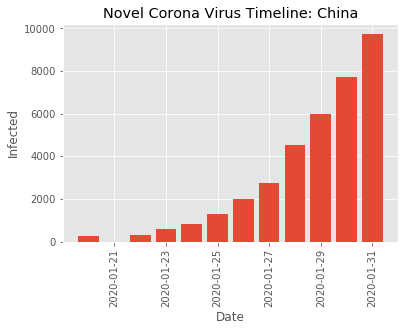

In [171]:
plot_China_Infected()

In [193]:
q = sn[sn.Area == 'China']

x1 = q.Date[q.Situation == 'Confirmed']
y1 = q.Value[q.Situation == 'Confirmed']
y2 = q.Value[q.Situation == 'Severe']

In [199]:
severe = q.Value[q.Situation == 'Severe']

,Date,Area,Situation,Value
1,2020-01-27,China,Confirmed,2741
2,2020-01-27,China,Suspected,5794
3,2020-01-27,China,Severe,461
4,2020-01-27,China,Deaths,80
7,2020-01-27,China,RiskAssessment,Very High
11,2020-01-28,China,Confirmed,4537
12,2020-01-28,China,Suspected,6973
13,2020-01-28,China,Severe,976
14,2020-01-28,China,Deaths,106
17,2020-01-28,China,RiskAssessment,Very High


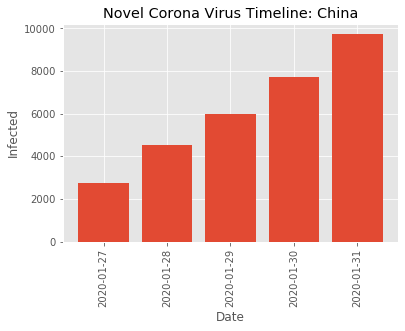

In [195]:
plt.bar(x1, y1, align ='center')
plt.title('Novel Corona Virus Timeline: China')
plt.ylabel('Infected')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.show()

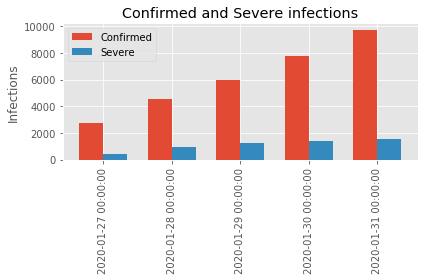

In [197]:
q = sn[sn.Area == 'China']

x1 = q.Date[q.Situation == 'Confirmed']
y1 = q.Value[q.Situation == 'Confirmed']
y2 = q.Value[q.Situation == 'Severe']
x = np.arange(len(x1))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='Confirmed')
rects2 = ax.bar(x + width/2, y2, width, label='Severe')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Infections')
ax.set_title('Confirmed and Severe infections')
ax.set_xticks(x)
ax.set_xticklabels(x1,rotation='vertical')
ax.legend()
fig.tight_layout()
plt.show()

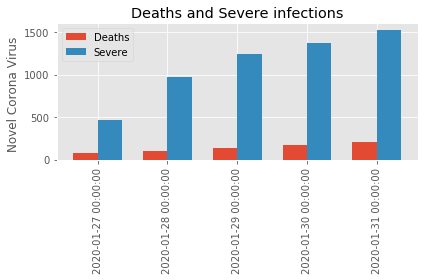

In [198]:
q = sn[sn.Area == 'China']

x1 = q.Date[q.Situation == 'Confirmed']
y1 = q.Value[q.Situation == 'Deaths']
y2 = q.Value[q.Situation == 'Severe']
x = np.arange(len(x1))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='Deaths')
rects2 = ax.bar(x + width/2, y2, width, label='Severe')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Novel Corona Virus ')
ax.set_title('Deaths and Severe infections')
ax.set_xticks(x)
ax.set_xticklabels(x1,rotation='vertical')
ax.legend()
fig.tight_layout()
plt.show()